In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os.path

In [3]:
out_path = "/work/scratch/malinoro/simulation_copula/out"
# out_path = "/Users/roman/Code/simulation_copula/out/backup"

## Multiple figures

In [4]:
def plot_possibilities(a, b):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    axes[0].scatter(range(len(a)), a.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="blue")
    axes[0].set_title("X poss")
    
    axes[0].set_xticks(ticks=range(len(a)))
    axes[0].set_xticklabels(labels=list(a.keys()))
    axes[0].set_yticks(ticks=list(a.values()))
    axes[0].set_yticklabels(labels=list(a.values()))
    
    
    axes[1].scatter(range(len(b)), b.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="orange")
    axes[1].set_title("Y poss")
    
    axes[1].set_xticks(ticks=range(len(b)))
    axes[1].set_xticklabels(labels=list(b.keys()))
    axes[1].set_yticks(ticks=list(b.values()))
    axes[1].set_yticklabels(labels=list(b.values()))
    
    if order_a is not None or order_b is not None:
        for k in order_a.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
                axes[2].plot([i - 0.5, i + 0.5], order_a[k], c="blue")
        axes[2].set_title("X Order")
        
        for k in order_b.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
                axes[3].plot([i - 0.5, i + 0.5], order_b[k], c="orange")
        axes[3].set_title("Y Order")
    
    fig.show()
    
    
def plot_possibilities(a, b, order_a, order_b):
    
    fig, axes = plt.subplots(2, 2, figsize=(15,10))

    axes[0,0].scatter(range(len(a)), a.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="blue")
    axes[0,0].set_title("X poss")
    
    axes[0,0].set_xticks(ticks=range(len(a)))
    axes[0,0].set_xticklabels(labels=list(a.keys()))
    axes[0,0].set_yticks(ticks=list(a.values()))
    axes[0,0].set_yticklabels(labels=list(a.values()))
    
    
    axes[0,1].scatter(range(len(b)), b.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="orange")
    axes[0,1].set_title("Y poss")
    
    axes[0,1].set_xticks(ticks=range(len(b)))
    axes[0,1].set_xticklabels(labels=list(b.keys()))
    axes[0,1].set_yticks(ticks=list(b.values()))
    axes[0,1].set_yticklabels(labels=list(b.values()))
    
    for k in order_a.keys():
        for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
            axes[1,0].plot([i-0.5,i+0.5], [order_a[k]]*2, c="blue")
    axes[1,0].set_title("X Order")
    axes[1,0].set_xticks(ticks=range(1, len(a)+1))
    axes[1,0].set_xticklabels(labels=list(a.keys()))
    axes[1,0].set_yticks(ticks=list(order_a.values()))
    axes[1,0].set_yticklabels(labels=list(order_a.values()))

    for k in order_b.keys():
        for i in [int(i) for i in "".join(k.split(",")).split("y") if i!=""]:
            axes[1,1].plot([i-0.5,i+0.5], [order_b[k]]*2, c="orange")
    axes[1,1].set_title("Y Order")
    axes[1,1].set_xticks(ticks=range(1, len(b)+1))
    axes[1,1].set_xticklabels(labels=list(b.keys()))
    axes[1,1].set_yticks(ticks=list(order_b.values()))
    axes[1,1].set_yticklabels(labels=list(order_b.values()))
    
    fig.show()

    
def plot_multiple_orders(df, row):
    assert df.loc[row, ('focal_sets', 'X')].isnull().any() , "The row you passed has no working order"
    atoms = [k[1] for k in df.columns if k[0]=="poss"]
    keys_x = [k for k in atoms if "x" in k]
    keys_y = [k for k in atoms if "y" in k]
    
    # Reading the possibility distributions
    poss_x = {i: df.loc[(row, 0), ("poss", i)] for i in keys_x}
    poss_y = {i: df.loc[(row, 0), ("poss", i)] for i in keys_y}
    
    # Counting the number of orders to plot
    n_orders = max(df.loc[(row,), :].index) + 1
    
    # Init figure + plotting possibility distribution
    fig, axes = plt.subplots(n_orders + 1, 2, figsize=(15, 5 * (n_orders + 1)))
    axes[0,0].scatter(range(len(poss_x)), poss_x.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="blue")
    axes[0,0].set_title("X poss")
    
    axes[0,0].set_xticks(ticks=range(len(poss_x)))
    axes[0,0].set_xticklabels(labels=list(poss_x.keys()))
    axes[0,0].set_yticks(ticks=list(poss_x.values()))
    axes[0,0].set_yticklabels(labels=list(poss_x.values()))
    
    
    axes[0,1].scatter(range(len(poss_y)), poss_y.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="orange")
    axes[0,1].set_title("Y poss")
    
    axes[0,1].set_xticks(ticks=range(len(poss_y)))
    axes[0,1].set_xticklabels(labels=list(poss_y.keys()))
    axes[0,1].set_yticks(ticks=list(poss_y.values()))
    axes[0,1].set_yticklabels(labels=list(poss_y.values()))
    
    for i_ord in range(n_orders):
        order_x = df.loc[(row, i_ord), ("focal_sets", "X")].split("<")
        order_x = {order_x[i]: i + 1 for i in range(len(order_x))}
        
        order_y = df.loc[(row, i_ord), ("focal_sets", "Y")].split("<") 
        order_y = {order_y[i]: i + 1 for i in range(len(order_y))}
        
        for k in order_x.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
                axes[i_ord + 1, 0].plot([i-0.5,i+0.5], [order_x[k]]*2, c="blue")
        axes[i_ord + 1, 0].set_title("X Order")
        axes[i_ord + 1, 0].set_xticks(ticks=range(1, len(poss_x)+1))
        axes[i_ord + 1, 0].set_xticklabels(labels=list(poss_x.keys()))
        axes[i_ord + 1, 0].set_yticks(ticks=list(order_x.values()))
        axes[i_ord + 1, 0].set_yticklabels(labels=list(order_x.values()))

        for k in order_y.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("y") if i!=""]:
                axes[i_ord + 1, 1].plot([i-0.5,i+0.5], [order_y[k]]*2, c="orange")
        axes[i_ord + 1, 1].set_title("Y Order")
        axes[i_ord + 1, 1].set_xticks(ticks=range(1, len(poss_y)+1))
        axes[i_ord + 1, 1].set_xticklabels(labels=list(poss_y.keys()))
        axes[i_ord + 1, 1].set_yticks(ticks=list(order_y.values()))
        axes[i_ord + 1, 1].set_yticklabels(labels=list(order_y.values()))
    
    fig.show()

# Analyse if df have the same possibilities 

In [5]:
df_1 = pd.read_csv(os.path.join(out_path, "random_orders_N3_clayton_2.csv"), header=[0,1], index_col=[0,1])
df_2 = pd.read_csv(os.path.join(out_path, "random_orders_N3_amh_05.csv"), header=[0,1], index_col=[0,1])

# Sorting the dataframe in order to create an lexical order. This improve performants when locating data later on

df_1 = df_1.sort_values(by=["Object", "Space"], axis=1) 
df_2 = df_2.sort_values(by=["Object", "Space"], axis=1) 

In [7]:
unique_poss_1 = df_1.xs(key=0, level="order", axis=0, drop_level=False).drop(axis=1, columns=["focal_sets"])
unique_poss_2 = df_2.xs(key=0, level="order", axis=0, drop_level=False).drop(axis=1, columns=["focal_sets"])

max_1 = max(df_1.index.get_level_values(level="poss"))
max_2 = max(df_2.index.get_level_values(level="poss"))

# Checking if one is larger than the other (i.e. had more simulation time or easier computations)
if max_1<max_2:
    print("df_2 is longer than df_1")
    unique_poss_1, unique_poss_2 = unique_poss_2, unique_poss_1
elif max_1>max_2:
    print("df_1 is longer than df_2")

df_1 is longer than df_2


In [8]:
(unique_poss_1.loc[unique_poss_2.index,:] == unique_poss_2).all().all()

True

# Checking orders

In [5]:
def keep_max_n_orders(df, n=1):
    cross_selection = df.xs(key=n, level="order", axis=0)
    index = df.index.sort_values()
    return index.drop(cross_selection.index, errors='ignore')

def get_max_orders(df):
    poss = df.index.get_level_values(level="poss").drop_duplicates()
    max_index = [max(df.xs(key=k, level="poss", axis=0).index) for k in poss]
    return pd.MultiIndex.from_arrays([poss, max_index])

def split_orders_nan(df: pd.DataFrame):
    mask = df[("focal_sets", "X")].isnull()
    return df[~mask], df[mask]

In [12]:
a, b = split_orders_nan(df_1)

In [13]:
k=0
b.loc[b.index[10*k:10*(k+1)], ("poss",)] 

,Space,x1,x2,x3,y1,y2,y3
poss,order,,,,,,
5,0,0.26,1.00,0.75,0.19,1.00,0.35
118,0,0.21,1.00,0.99,0.44,1.00,0.62
183,0,0.12,1.00,0.52,0.24,1.00,0.90
197,0,1.00,0.43,1.00,0.15,1.00,0.57
289,0,0.40,1.00,0.90,0.70,1.00,0.79
430,0,0.01,1.00,0.80,0.08,1.00,0.78
469,0,0.04,1.00,0.88,1.00,0.36,1.00
677,0,1.00,0.30,0.97,0.61,1.00,0.67
740,0,0.74,0.52,1.00,0.06,1.00,0.88


In [9]:
m1, m2 = get_max_orders(df_1), get_max_orders(df_2)

row = np.array([-1])
score = np.array([np.inf])

n_dim = len([i for i in df_1.columns.get_level_values("Space") if "x" in i])

for i, j in zip(m1, m2):
    nx_focal_sets = len(df_1.loc[i, ("focal_sets", "X")].split("<"))
    ny_focal_sets = len(df_1.loc[i, ("focal_sets", "Y")].split("<"))
    
    # We minimize the number of different working orders for both dataframes and adding a penality if there are too few focal sets
    if i[1]**2 + j[1]**2 + (2*n_dim - nx_focal_sets - ny_focal_sets)**2 <= score[-1]:
        score = np.hstack((score, np.array([i[1]**2+j[1]**2])))
        row = np.hstack((row, np.array([i[0]])))
mask = score == score.min()
score = score[mask]
row = row[mask]

print(row)

[   3    5   11   52   97  111  118  123  127  161  183  185  214  226
  245  249  263  285  289  335  354  361  418  430  445  477  491  512
  551  563  572  574  597  619  623  640  655  676  677  692  694  704
  720  740  765  774  786  822  823  887  897  900  919  934  936 1049
 1081 1096 1205 1265 1298 1352 1368 1402 1431 1450 1459 1485 1507 1548
 1586 1657 1678 1709 1762 1767 1792 1798 1800 1819 1853 1897 1962 2034
 2057 2072 2078 2080 2102 2152 2172 2194 2195 2205 2230 2258 2272 2294
 2322 2323 2328 2339 2342 2360 2388 2398 2412 2434 2450 2474 2498 2499
 2509 2562 2566 2568 2574 2605 2656 2694 2700 2721 2751 2781 2792 2801
 2808 2847 2850 2853 2881 2958 3006 3042 3054 3070 3100 3130 3158 3204
 3227 3301 3306 3321 3324 3328 3360 3392 3404 3415 3421 3504 3509 3535
 3549 3558 3613 3620 3661 3680 3682 3713 3717 3728 3744 3755 3785 3792
 3818 3827 3832 3840 3869 3892 3903 3906 3922 3926 3927 3996 4003 4044
 4047]


Row:  2


Object         focal_sets                     poss                            
Space                   X                  Y    x1   x2    x3    y1   y2    y3
order                                                                         
0       x1,x2,x3<x2,x3<x2  y1,y2,y3<y1,y2<y2  0.03  1.0  0.75  0.66  1.0  0.56
1       x2<x2,x3<x1,x2,x3  y2<y1,y2<y1,y2,y3  0.03  1.0  0.75  0.66  1.0  0.56

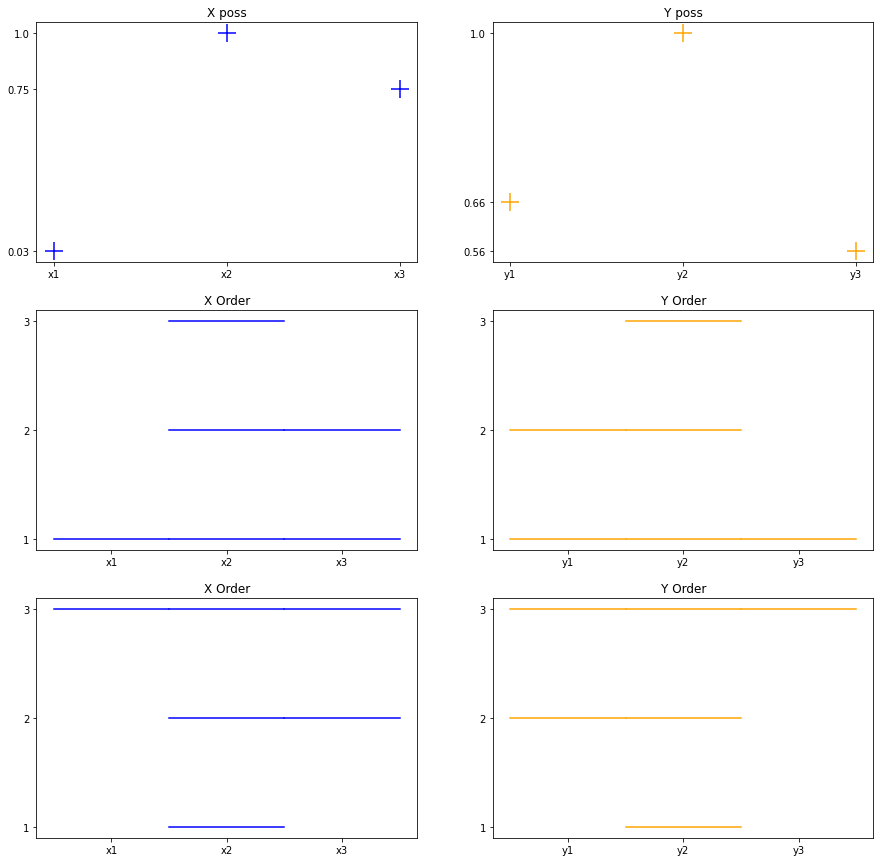

In [10]:
# k = row[2]
k = 2

print("Row: ", k)
plot_multiple_orders(df_1, k)
df_1.loc[(k,), :].head()

# Checking if smallest -> biggest orders work

In [6]:
# Function that check if the focal sets are ordered such with increasing size
def is_size_ordered(string):
    s = string.split("<")
    s = np.array([len(s_.split(",")) for s_ in s])
    if (s == np.sort(s)).all():
        return "s->b" # smallest to biggest
    elif (s == np.flip(np.sort(s))).all():
        return "b->s" # biggest to smallest
    else:
        return None

### Countermonotonic: s->b X b->s  and  b->s X s->b 

In [7]:
def check_countermonotonic_order(df):
    for poss_ind in range(max(df.index.get_level_values("poss"))):
        max_order = max(df.loc[(poss_ind, ), :].index.get_level_values("order"))
        list_is_ordered = [[is_size_ordered(df.loc[(poss_ind, i), ('focal_sets', 'X')]), is_size_ordered(df.loc[(poss_ind, i), ('focal_sets', 'Y')])] for i in range(max_order + 1)]
        flag = (['b->s', 's->b'] in list_is_ordered) & (['s->b', 'b->s'] in list_is_ordered)
        if not flag:
            print("Check row %s"%poss_ind)
            break
    if flag:
        print("Counter monotonic order is working")

In [16]:
check_countermonotonic_order(df_2)

Check row 0


### Comonotonic: s->b X s->b  and  b->s X b->s 

In [8]:
def check_comonotonic_order(df):
    for poss_ind in range(max(df.index.get_level_values("poss"))):
        max_order = max(df.loc[(poss_ind, ), :].index.get_level_values("order"))
        list_is_ordered = [[is_size_ordered(df.loc[(poss_ind, i), ('focal_sets', 'X')]), is_size_ordered(df.loc[(poss_ind, i), ('focal_sets', 'Y')])] for i in range(max_order + 1)]
        flag = (['b->s', 'b->s'] in list_is_ordered) & (['s->b', 's->b'] in list_is_ordered)
        if not flag:
            print("Check row %s"%poss_ind)
            break
    if flag:
        print("Comonotonic order is working")

In [18]:
check_comonotonic_order(df_1)

Check row 0


# TEMP

In [19]:
#"random_orders_N3_amh_-05.csv", "random_orders_N3_amh_05.csv",
#"random_orders_N3_frank_-5.csv", "random_orders_N3_frank_5.csv",
#"random_orders_N3_min.csv", "random_orders_N3_luka.csv"
#"random_orders_N4_min.csv", "random_orders_N4_luka.csv",
#"random_orders_N3_clayton_-05.csv", "random_orders_N3_clayton_2.csv",
#"random_orders_N3_gumbel_05.csv",

# Those copulas can produce non working orders :
list_csv = ["random_orders_N3_amh_05.csv", "random_orders_N3_clayton_-05.csv", "random_orders_N3_clayton_2.csv", "random_orders_N3_gumbel_05.csv"]
list_index = []
for csv in list_csv:
    df = pd.read_csv(os.path.join(out_path, csv), header=[0,1], index_col=[0,1])
    _, b = split_orders_nan(df)
    list_index += [b.index]


In [20]:
print(len(list_index[1]), len(list_index[2]))
print(len([k for k in list_index[1] if k in list_index[2]]))


97 81
39


In [11]:
df = pd.read_csv(os.path.join(out_path, "random_orders_N3_clayton_-05.csv"), header=[0,1], index_col=[0,1])
_, a = split_orders_nan(df)
df = pd.read_csv(os.path.join(out_path, "random_orders_N3_clayton_2.csv"), header=[0,1], index_col=[0,1])
_, b = split_orders_nan(df)

# Finding handy event that illustrate that no order is working

In [9]:
import itertools

from necessity_functions import NecessityUnivariate, NecessityBivariate
from robust_set_sampling import RobustCredalSetUnivariate, RobustCredalSetBivariate
from random_ordering_focal_set_importance import random_generator_poss
from copulas import min_copula, lukaciewicz_copula, frank_copula, ali_mikhail_haq_copula, clayton_copula, gumbel_copula

### Test orders on a given couple of possibilities

In [10]:
x_space = ["x1", "x2", "x3"]
y_space = ["y1", "y2", "y3"]

poss_x = {'x1':0.2, "x2":1, "x3":0.7}
poss_y = {'y1':0.2, "y2":1, 'y3': 0.7}

order_x_precise = pd.DataFrame(columns=["order"], index=x_space, data=range(1, len(x_space) + 1))
order_y_precise = pd.DataFrame(columns=["order"], index=y_space, data=range(1, len(y_space) + 1))

In [11]:
theta = 2
def copula(u, v):
    return clayton_copula(u, v, theta)

In [12]:
# Initializing the dataframe that stores results
multi_col = pd.MultiIndex.from_tuples(list(
    zip(["poss"] * (len(x_space) + len(y_space)) + ["focal_sets", "focal_sets"],
        x_space + y_space + ["X", "Y"])), names=["Object", "Space"])
multi_index = pd.MultiIndex.from_product([pd.Index(name = "poss", data=[]), pd.Index(name="order", data=[])])

final_df = pd.DataFrame(columns=multi_col, index=multi_index, data=np.nan)

In [13]:
# Finding focal sets
nec_x_vanilla = NecessityUnivariate(poss_x)
rob_x = RobustCredalSetUnivariate(nec_x_vanilla, samples_per_interval=10)

nec_y_vanilla = NecessityUnivariate(poss_y)
rob_y = RobustCredalSetUnivariate(nec_y_vanilla, samples_per_interval=10)

rob_xy = RobustCredalSetBivariate(rob_x, rob_y, order_x_precise, order_y_precise, copula)

In [14]:
if os.path.exists("/work/scratch/malinoro/simulation_copula/robust_xy_clayton_2.csv"):
    nec_xy_inf = pd.read_csv("/work/scratch/malinoro/simulation_copula/nec_inf_clayton_2.csv", index_col=[0, 1], header=[0, 1])
    rob_xy.approximation = pd.read_csv("/work/scratch/malinoro/simulation_copula/robust_xy_clayton_2.csv", index_col=[0, 1])
    print("CSV loaded, you should not run the following cells")
else:
    print("Could not find the .csv files, maybe check path or run following cells to create them")

CSV loaded, you should not run the following cells


In [ ]:
print("Computing robust credal set...")
rob_xy.approximate_robust_credal_set()
print("Done.")

In [7]:
rob_xy.approximation.to_csv("/work/scratch/malinoro/simulation_copula/robust_xy_clayton_2.csv")

In [20]:
# Testing orders
flag_order_work = False

# Creating a complex dataframe: rows being events and columns being different orders on focal sets
i1 = []
for perm_x in itertools.permutations(range(1, len(nec_x_vanilla.mass.index) + 1)):
    order_x = pd.DataFrame(columns=["order"], index=nec_x_vanilla.mass.index, data=perm_x)
    i1 += ["<".join(order_x.sort_values(by="order").index)]
    
i2 = []
for perm_y in itertools.permutations(range(1, len(nec_y_vanilla.mass.index) + 1)):
    order_y = pd.DataFrame(columns=["order"], index=nec_y_vanilla.mass.index, data=perm_y)
    ["<".join(order_y.sort_values(by="order").index)]
    
col_multi = pd.MultiIndex.from_product([i1, i2], names=["order_X", "order_Y"])

nec_xy_inf = pd.DataFrame(index=rob_xy.approximation.index, columns=col_multi)
nec_xy_inf.fillna(value=2, inplace=True)

print("Starting permutations") 
for perm_x in itertools.permutations(range(1, len(nec_x_vanilla.mass.index) + 1)):
    order_x = pd.DataFrame(columns=["order"], index=nec_x_vanilla.mass.index, data=perm_x)
    nec_x = NecessityUnivariate(poss_x, order_x)

    for perm_y in itertools.permutations(range(1, len(nec_y_vanilla.mass.index) + 1)):
        order_y = pd.DataFrame(columns=["order"], index=nec_y_vanilla.mass.index, data=perm_y)
        nec_y = NecessityUnivariate(poss_y, order_y)

        nec_xy = NecessityBivariate(nec_x, nec_y, copula)
        
        key_x = "<".join(order_x.sort_values(by="order").index)
        key_y = "<".join(order_y.sort_values(by="order").index)
        nec_xy_inf.loc[:, (key_x, key_y)] = np.array(nec_xy.necessity.loc[nec_xy.necessity.index, "Nec"])

        if ((rob_xy.approximation["P_inf"] - nec_xy.necessity["Nec"]) > - rob_xy.rob_x.epsilon).all():
            flag_order_work = True

if not flag_order_work:
    print("No order is working!")

Starting permutations
No order is working!


In [21]:
nec_xy_inf.to_csv("nec_inf_clayton_2.csv")

## Finding two couples of events such that Nec cannot be inferior to P_inf on those two events at the same time

In [15]:
list_event = []

for xy1 in nec_xy_inf.index:
    rob_1 = rob_xy.approximation.loc[xy1, "P_inf"]
    
    for xy2 in nec_xy_inf.index:
        rob_2 = rob_xy.approximation.loc[xy2, "P_inf"]

                
        arr_bool_1 = nec_xy_inf.loc[xy1, :] > (rob_1 + rob_xy.rob_x.epsilon)
        arr_bool_2 = nec_xy_inf.loc[xy2, :] > (rob_2 + rob_xy.rob_y.epsilon)

        if (arr_bool_1 | arr_bool_2).all():
            list_event += [(xy1, xy2)]

list_event = list(set(list_event))

print(list_event)

[(('x1,x2', 'y2,y3'), ('x2,x3', 'y1,y2')), (('x2,x3', 'y1,y2'), ('x1,x2', 'y2,y3')), (('x2,x3', 'y2'), ('x1,x2', 'y2,y3')), (('x2', 'y2,y3'), ('x2,x3', 'y1,y2')), (('x1,x2', 'y2,y3'), ('x2,x3', 'y2')), (('x2,x3', 'y2'), ('x2', 'y2,y3')), (('x2,x3', 'y1,y2'), ('x2', 'y2,y3')), (('x2', 'y2,y3'), ('x2,x3', 'y2'))]


In [16]:
print(rob_xy.approximation.loc[[('x2', 'y2,y3'), ('x2,x3', 'y2')], "P_inf"])
nec_1 = pd.DataFrame(index=nec_xy_inf.columns.get_level_values(level="order_X").drop_duplicates(), columns=nec_xy_inf.columns.get_level_values(level="order_Y").drop_duplicates())
nec_2 = pd.DataFrame(index=nec_xy_inf.columns.get_level_values(level="order_X").drop_duplicates(), columns=nec_xy_inf.columns.get_level_values(level="order_Y").drop_duplicates())

for x_i, y_i in nec_xy_inf.columns:
    nec_1.loc[x_i, y_i] = nec_xy_inf.loc[('x2', 'y2,y3'), (x_i, y_i)]
    nec_2.loc[x_i, y_i] = nec_xy_inf.loc[('x2,x3', 'y2'), (x_i, y_i)]

nec_1 = nec_1.astype(float).round(3)
nec_2 = nec_2.astype(float).round(3)

nec_1.index.name, nec_1.columns.name = "", ""
nec_2.index.name, nec_2.columns.name = "", ""

X      Y    
x2     y2,y3    0.131237
x2,x3  y2       0.131237
Name: P_inf, dtype: float64


In [17]:
nec_1

,"y1,y2,y3<y2,y3<y2","y1,y2,y3<y2<y2,y3","y2,y3<y1,y2,y3<y2","y2<y1,y2,y3<y2,y3","y2,y3<y2<y1,y2,y3","y2<y2,y3<y1,y2,y3"
,,,,,,
"x1,x2,x3<x2,x3<x2",0.296,0.296,0.224,0.259,0.180,0.180
"x1,x2,x3<x2<x2,x3",0.254,0.254,0.240,0.208,0.270,0.270
"x2,x3<x1,x2,x3<x2",0.296,0.296,0.224,0.259,0.180,0.180
"x2<x1,x2,x3<x2,x3",0.131,0.131,0.279,0.251,0.293,0.293
"x2,x3<x2<x1,x2,x3",0.291,0.291,0.216,0.236,0.218,0.218
"x2<x2,x3<x1,x2,x3",0.131,0.131,0.279,0.251,0.293,0.293


## Augmenting the resolution for Rob_XY and Clayton theta=2

In [4]:
def rob_e(Px1, Px2, Py1):
    if Px1+Px2>1:
        return np.nan
    if Py1==0:
        return Px2
    elif Px1==0:
        return Px2 - Px2*Py1/(Px2**2+Py1**2-(Px2**2)*(Py1**2))**0.5
    else:
        return Px2 + Px1*Py1/(Px1**2+Py1**2-(Px1**2)*(Py1**2))**0.5 - (Px2+Px1)*Py1/((Px2+Px1)**2+Py1**2-((Px2+Px1)**2)*(Py1**2))**0.5
    
def cartesian_prod(arrays):
    cartesian_product = np.empty([len(a) for a in arrays] + [len(arrays)], dtype=float) # Creates an empty array with dimension n_x1, n_x2, n_x3, 3
    for i, a in enumerate(np.ix_(*arrays)):
        cartesian_product[...,i] = a
    return cartesian_product.reshape(-1, len(arrays))

rob_e = np.vectorize(rob_e)

In [37]:
resolution = 0.005

Px1_vec = np.arange(0, 0.2 + resolution, resolution)
Px2_vec = np.arange(0.3, 1 + resolution, resolution)
Px3_vec = np.arange(0, 0.7 + resolution, resolution)

epsilon = 1e-6
Px1_vec

arrays = [Px1_vec, Px2_vec, Px3_vec]  # list of array we want to cross with cartesian product
cartesian_product = cartesian_prod(arrays)
cartesian_product = cartesian_product[np.all(-epsilon <= cartesian_product, axis=1) & np.all(cartesian_product<=1+epsilon, axis=1)]
cartesian_product = cartesian_product[np.abs(cartesian_product.sum(axis=1)-1)<=epsilon]
cartesian_product

array([[0.   , 0.3  , 0.7  ],
       [0.   , 0.305, 0.695],
       [0.   , 0.31 , 0.69 ],
       ...,
       [0.2  , 0.79 , 0.01 ],
       [0.2  , 0.795, 0.005],
       [0.2  , 0.8  , 0.   ]])

In [38]:
resolution = 100

Px1_vec = np.linspace(0, 0.2, resolution)
Px2_vec = np.linspace(0.3, 1, resolution)
Px3_vec = np.linspace(0, 0.7, resolution)

arrays = [Px1_vec, Px2_vec]  # list of array we want to cross with cartesian product
cartesian_product = cartesian_prod(arrays)
cartesian_product = np.hstack((cartesian_product, 1-np.expand_dims(np.sum(cartesian_product, axis=1), axis=1)))  # Adding the value of the last atom because P is normalized
cartesian_product = cartesian_product[np.all(0 <= cartesian_product, axis=1) & np.all(cartesian_product<=1, axis=1)]  # Keeping only rows where P is in [0,1]
cartesian_product

array([[0.        , 0.3       , 0.7       ],
       [0.        , 0.30707071, 0.69292929],
       [0.        , 0.31414141, 0.68585859],
       ...,
       [0.2       , 0.78080808, 0.01919192],
       [0.2       , 0.78787879, 0.01212121],
       [0.2       , 0.79494949, 0.00505051]])

In [26]:
Py1_vec = np.linspace(0, 0.2, resolution)

arrays = [Px1_vec, Px2_vec, Py1_vec]  # list of array we want to cross with cartesian product
cartesian_product = cartesian_prod(arrays)

P_e1 = rob_e(cartesian_product[:,0], cartesian_product[:,1], cartesian_product[:,2])


In [39]:
p

,a,b,c
0,0.0,0.300000,0.700000
1,0.0,0.307071,0.692929
2,0.0,0.314141,0.685859
3,0.0,0.321212,0.678788
4,0.0,0.328283,0.671717
...,...,...,...
8538,0.2,0.766667,0.033333
8539,0.2,0.773737,0.026263
8540,0.2,0.780808,0.019192
8541,0.2,0.787879,0.012121


,order
b,1
c,2
a,3


In [55]:
order = pd.DataFrame(columns=["order"], index=["a","b","c"], data=[3,1,2])
order.sort_values(["order"])
q = p.copy()
q["empty"]=0
q = q[["empty"] + order.sort_values(["order"]).index.to_list()].cumsum(axis=1)


,empty,b,c,a
0,0.0,0.300000,1.0,1.0
1,0.0,0.307071,1.0,1.0
2,0.0,0.314141,1.0,1.0
3,0.0,0.321212,1.0,1.0
4,0.0,0.328283,1.0,1.0
...,...,...,...,...
8538,0.0,0.766667,0.8,1.0
8539,0.0,0.773737,0.8,1.0
8540,0.0,0.780808,0.8,1.0
8541,0.0,0.787879,0.8,1.0


In [68]:
q[["b", "empty"]].sum(axis=1).min()

0.3